<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Sebastian Tinoco
- Auxiliar: Catherine Benavides, Consuelo Rojas
- Ayudante: Eduardo Moya, Nicolás Ojeda

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Bárbara Aguayo
- Nombre de alumno 2: Camila Figueroa


### **Link de repositorio de GitHub:** `http://github.com/bluemili/MDS7202-Labs`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_data.csv to diabetes_data.csv


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.). Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes?,
  * ¿Qué buscan explicar las métricas utilizadas?
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?

In [ ]:
!pip install xgboost

In [ ]:
# Inserte su código aquí

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [ ]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(df.isna().sum())

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


Como no se visualizan columnas categóricas, ni valores nulos, en esta ocasión se utilizará solamente un Scaler (No se trabajará con OneHotEncoder o similares ni con ningún Imputer)

In [ ]:
# Librerias utiles
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

numerical_columns = list(df.columns)
numerical_columns.remove("Diabetes")
column_transformer = ColumnTransformer([('StandardScaler', StandardScaler(), numerical_columns),
                                        ])

In [ ]:
from xgboost import XGBClassifier

pipeline = Pipeline([
    ('col_tranformer', column_transformer),
    ('xgb', XGBClassifier())
])

In [ ]:
from sklearn.model_selection import train_test_split
features = df.drop(columns=["Diabetes"])
labels = df.loc[:, "Diabetes"]


X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, shuffle=True, stratify=labels, random_state=42
)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_tranformer',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  StandardScaler(),
                                                  ['Age', 'Sex', 'HighChol',
                                                   'CholCheck', 'BMI', 'Smoker',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'GenHlth', 'MentHlth',
                                                   'PhysHlth', 'DiffWalk',
                                                   'Stroke', 'HighBP'])])),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callb...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
pred_xgb = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

#Accuracy general
acc_xgb = accuracy_score(y_test, pred_xgb)
print(f"Accuracy XGBoost: {acc_xgb}")

#Precision
precision_xgb = precision_score(y_test, pred_xgb, pos_label=1)
print(f"Precision XGBoost: {precision_xgb}")

#Recall
recall_xgb = recall_score(y_test, pred_xgb, pos_label=1)
print(f"Recall XGBoost: {recall_xgb}")

Accuracy XGBoost: 0.7464460004243582
Precision XGBoost: 0.7264690587623505
Recall XGBoost: 0.7904937049087566


Matriz de confusión




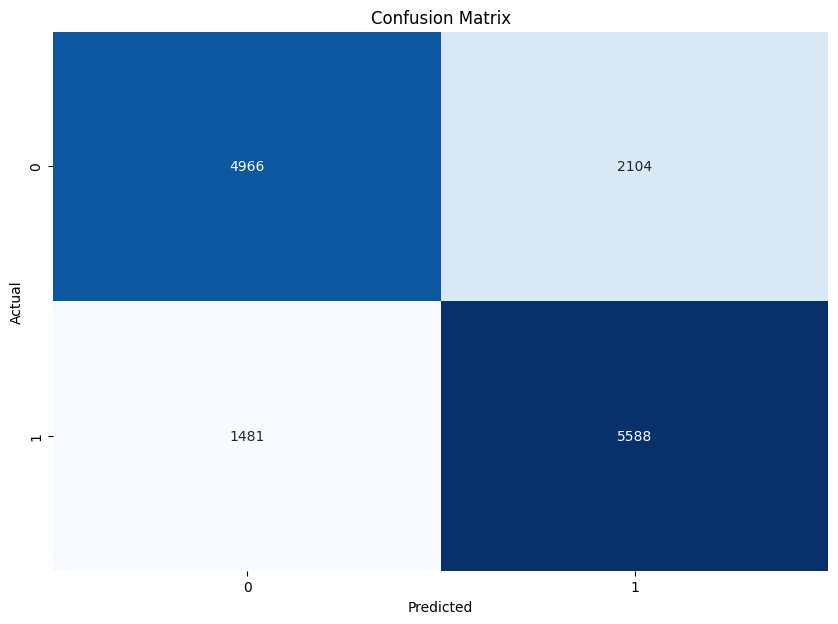

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      7070
         1.0       0.73      0.79      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Matriz de confusión\n\n")

cm = confusion_matrix(y_test, pred_xgb)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, pred_xgb))

  *  **¿Es acaso un buen predictor de diabetes?**

  Es un predictor medianamente bueno, ya que las métricas que presentan son relativamente altas. Aunque  de todas formas, al evaluar el contexto del problema de detección de diabetes, donde se necesita una certeza indudable, el predictor no es lo bastantemente bueno para ponerlo en marcha.

  * **¿Qué buscan explicar las métricas utilizadas?**

  En el caso particular del dataset que se esta evaluando, hay una distribución equitativa de ambas clases (positiva y negativa), por lo que métricas como el accuracy, precision y recall tienen representaciones confiables, al igual que F1.

  El **accuracy** indica cuántas predicciones en general realizó correctamente el modelo con respecto al total de predicciones. Para este caso, el modelo predice correctamente un 74.64% de las veces.

  La **precisión** de un modelo da cuenta de las falsas alarmas, es decir, la proporción de predicciones positivas correctamente etiquetadas por sobre el total de los datos clasificados positivos. En el caso del modelo entrenado, al predecir diabetes, predice correctamente un 72.64% de las veces.

  El **recall** muestra cuántas predicciones de la clase positiva fueron correctamente clasificadas con respecto a todos los datos positivos reales. Para este caso se tiene que el modelo es capaz de identificar el 79.04% de los casos de diabetes.

  En cuanto al **f1 score**, se puede observar que el modelo equilibra correctamente  precision y recall, logrando minimizar tanto las falsas alarmas como los falsos negativos en un alto porcentaje.
  
  * **¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?**

  Las métricas como accuracy, precision, recall y F1 score nos hablan de la calidad de las predicciones y eficacia del modelo, pero no entregan ninguna información con respecto a la correcta elección de caracteristicas. Si bien esto se podría realizar comparando dichas métricas con un modelo similar, pero con caracteristicas reducidas, la elección de estas caracteristicas debe realizarse mediante otras técnicas como feature importance, feature selection o el analisis de shap values.

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`.
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados.
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

<Figure size 1000x700 with 0 Axes>

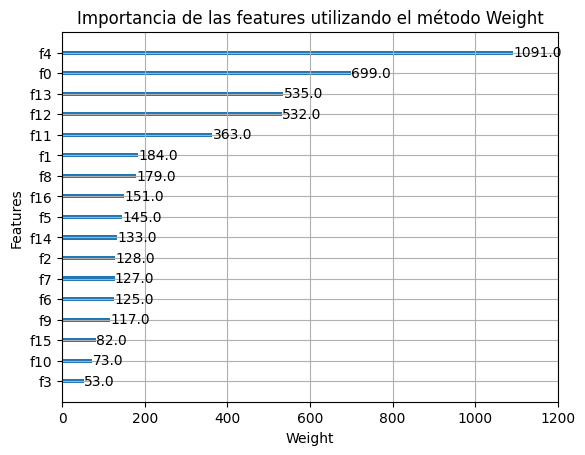

<Figure size 1000x700 with 0 Axes>

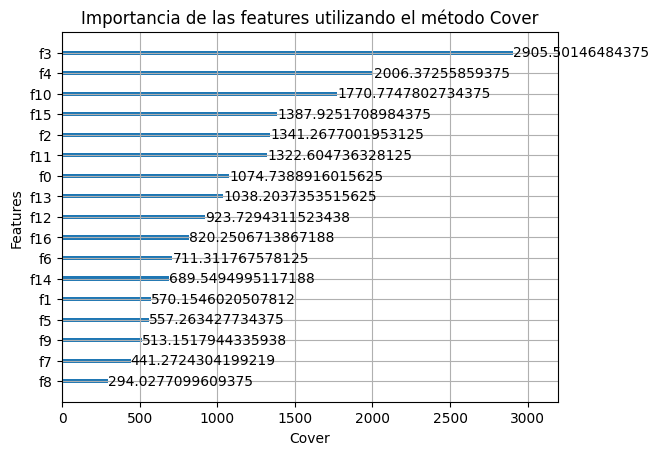

<Figure size 1000x700 with 0 Axes>

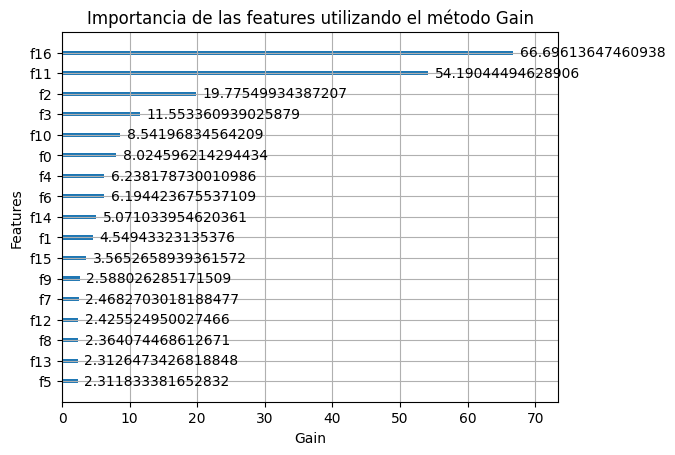

In [ ]:
# Inserte su código aquí
import xgboost as xgb
# Método weight
plt.figure(figsize=(10, 7))
xgb.plot_importance(pipeline[1], importance_type='weight', xlabel='Weight')
plt.title("Importancia de las features utilizando el método Weight")
plt.show()

# Método cover
plt.figure(figsize=(10, 7))
xgb.plot_importance(pipeline[1], importance_type='cover', xlabel='Cover')
plt.title("Importancia de las features utilizando el método Cover")
plt.show()

# Método gain
plt.figure(figsize=(10, 7))
xgb.plot_importance(pipeline[1], importance_type='gain', xlabel='Gain')
plt.title("Importancia de las features utilizando el método Gain")
plt.show()

In [ ]:
for i in range(len(numerical_columns)):
    print(f"{i}: {numerical_columns[i]}")

0: Age
1: Sex
2: HighChol
3: CholCheck
4: BMI
5: Smoker
6: HeartDiseaseorAttack
7: PhysActivity
8: Fruits
9: Veggies
10: HvyAlcoholConsump
11: GenHlth
12: MentHlth
13: PhysHlth
14: DiffWalk
15: Stroke
16: HighBP


**¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados**

R: A partir de los resultados, se puede ver que no exite una buena compatibilidad con respecto a la importancia que le dan a las características los distintos métodos utilizados. Si bien algunas características se repiten en el top 5 de los tres métodos, como es el caso de la característica 11 'GenHlth'. En los demás casos estan en un orden muy distinto, como lo es la característica 3 la cual esta en un orden bien elevado segun los métodos de Gain y Cover, pero no asi en Weight, donde es la característica con menos importancia.

Esta diferencia de los resultados se debe a la manera en que cada método define y mide esta importancia.

En el caso del **Método Weight**, este mide el número de veces que una característica se utiliza para dividir los datos a lo largo de todos los árboles, pero no como estos mejoran las divisiones. De esta forma indica la frecuencia pero no su relevancia por si sola.

El **Método Cover** indica la fracción de las instancias cubiertas por los nodos que contienen la característica, dando cuenta de la cantidad de datos que se ven influenciados por esta y el impacto que generan, pero no entrega información sobre la calidad de las divisiones.

El **Método Gain** da cuenta del promedio del aumento en la métrica de pérdida de los nodos donde se usa la característica, entregando una relación directa con la calidad y mejora del modelo respecto a cierta caracteristica.

**¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presentan estos métodos?**

R: Si bien los distintos métodos de importancia entregan información de cómo ve el modelo a las diferentes características, existen limitaciones que no permiten obtener la interpretabilidad total del modelo.

Un ejemplo de ello ocurre con las interacciones complejas, donde ciertos métodos dan cuenta de la importancia individual, pero no conjunta. Tambien ocurre que las características altamente correlacionadas tieden a sobrevalorarse, ya que pueden usarse de manera intercambiable en diferentes ramas del árbol.




## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features.
2. Visualice los resultados de este método en un gráfico.
3. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?).
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta?
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido?
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [ ]:
# Inserte su código aquí
from sklearn.inspection import permutation_importance
import numpy as np

result = permutation_importance(pipeline[1], X_test, y_test, n_repeats=30, random_state=42)

In [ ]:
result

{'importances_mean': array([-0.00038428,  0.        ,  0.02014758,  0.00706556,  0.        ,
         0.        ,  0.        ,  0.00180116, -0.0027654 ,  0.00598109,
         0.        ,  0.02359667, -0.00363769,  0.01963128,  0.        ,
         0.        ,  0.04758941]),
 'importances_std': array([0.00021813, 0.        , 0.00151182, 0.00082143, 0.        ,
        0.        , 0.        , 0.00057218, 0.00176082, 0.00123081,
        0.        , 0.001025  , 0.0014602 , 0.00143195, 0.        ,
        0.        , 0.0014814 ]),
 'importances': array([[-4.24358158e-04, -4.95084518e-04, -5.65810878e-04,
         -3.53631799e-04, -4.24358158e-04, -7.07263597e-04,
         -3.53631799e-04, -2.12179079e-04, -4.24358158e-04,
         -8.48716317e-04, -3.53631799e-04, -3.53631799e-04,
          2.12179079e-04, -3.53631799e-04, -5.65810878e-04,
         -4.95084518e-04, -7.07263597e-05, -7.07263597e-05,
         -4.24358158e-04, -7.07263597e-04, -4.95084518e-04,
         -1.41452719e-04, -3.5363

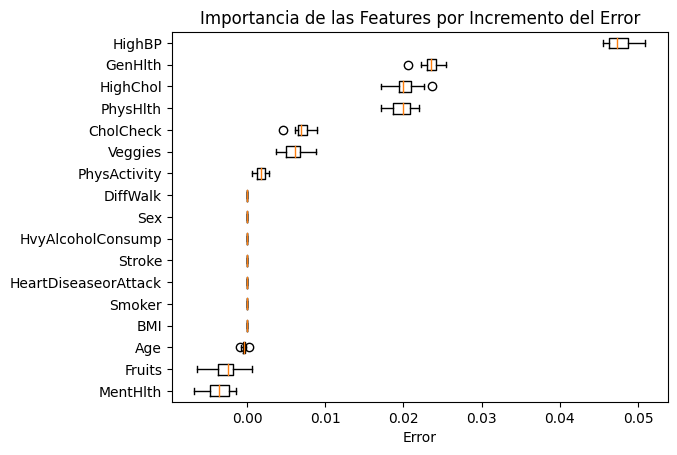

In [ ]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(numerical_columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

**¿Cómo mide la importancia de las features su propuesta?**

La importancia de las características se mide observando el impacto que tiene la permutación (alteración aleatoria) de cada característica en el error del modelo. Esta metodología permite identificar y cuantificar qué características son más influyentes comparando cómo afecta la permutación de cada una de las features al error total del modelo.

En la gráfica, se puede ver que la característica 'HighBP' agrega un error significativamente mayor en comparación con otras características cuando se permuta. Esto podría indicar que 'HighBP' es una característica relevante para el modelo. Otras tres características también incrementan el error de manera moderada, sugiriendo que tienen una importancia considerable pero menor que 'HighBP'. El resto de las variables incrementan el error solo ligeramente, lo que podría implicar que tienen una menor importancia en la predicción global del modelo.

**¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido?**

De acuerdo a la gráfica, se puede observar que las caracteríscticas con mayor impacto al aplicar incremento del error son: HighBP, GenHlth, HighChol, PhysHlth y CholCheck.

En este caso, se visualiza que las caracteristicas obtenidas en los primeros lugares son factores que se podrían relacionar con la diabetes. Esto debido a que se tiene que las características se relacionan con la presión arterial alta, el estado del colesterol y la salud, lo que tiene sentido que se asocien con una mala salud y posiblemente diabetes.

**¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?**

Comparando estas conclusiones con los resultados obtenidos previamente mediante los métodos de importancia de características de XGBoost (Weight, Cover, Gain), observamos que hay algunas similitudes y diferencias en las características destacadas. Por ejemplo, GenHlth fue una de las características comunes en el top 5 en los diferentes métodos de XGBoost, lo que coincide con su alta importancia en el método de permutación.

Sin embargo, algunas de las otras características pueden no haber sido tan prominentes en todos los métodos de XGBoost, dado que solo en cero, una o dos como máximo de las gráficas se visualizan en los primeros lugares del feature importance.

**Nombre y explique 3 ventajas y 3 desventajas del método implementado.**

**Ventajas:**
1. Es un método fácil de entender, ya que evalúa la importancia de una característica al observar el cambio en el rendimiento del modelo cuando se permuta (altera aleatoriamente) esa característica.
2. Permite conocer cómo cada característica afecta el desempeño general del modelo, lo que significa que se obtiene una comprensión de la interpretabilidad global.
3. Permite realizar una comparación de la importancia de las características entre entre diferentes modelos, lo que facilita el análisis comparativo.

**Desventajas:**
1. Requiere conocer los valores reales de las etiquetas de los datos de test, lo que puede no estar disponible en todos los casos.
2. Si las características están correlacionadas, el método puede introducir sesgos al evaluar la importancia de estas.
3. Añadir una característica que está correlacionada a otra puede reducir la importancia de una característica existente, ya que la importancia se divide entre las dos características correlacionadas.


## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo.
2. ¿Qué representa cada número en su resultado?
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.4 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [ ]:
# Inserte código para calcular shapley values aquí

import shap
explainer = shap.Explainer(pipeline[1])
shap_values = explainer(X_test)


In [ ]:
shap_values

.values =
array([[ 0.15057848, -0.12194982,  0.2732656 , ..., -0.03288842,
        -0.02553558,  0.63167197],
       [ 0.20587331, -0.05425646,  0.24943227, ..., -0.02336557,
        -0.01447783,  0.6453241 ],
       [ 0.21832056, -0.05769151,  0.31527185, ..., -0.02126196,
        -0.01454447,  0.60638654],
       ...,
       [ 0.23670042, -0.04139744,  0.24192718, ...,  0.03630238,
        -0.02693973,  0.61929315],
       [ 0.39341015, -0.10375938,  0.18371099, ..., -0.05485078,
        -0.02231925,  0.65879804],
       [ 0.19215807, -0.13356563, -0.43518814, ...,  0.09457784,
        -0.00616105, -0.8469229 ]], dtype=float32)

.base_values =
array([-0.00910757, -0.00910757, -0.00910757, ..., -0.00910757,
       -0.00910757, -0.00910757], dtype=float32)

.data =
array([[10.,  0.,  1., ...,  1.,  0.,  1.],
       [12.,  0.,  1., ...,  1.,  0.,  1.],
       [13.,  0.,  1., ...,  0.,  0.,  1.],
       ...,
       [11.,  1.,  1., ...,  1.,  0.,  1.],
       [10.,  0.,  1., ...,  1.,  0.

In [ ]:
# transformar logits a probabilidad
np.exp(shap_values.base_values) / (1 + np.exp(shap_values.base_values))

array([0.49772313, 0.49772313, 0.49772313, ..., 0.49772313, 0.49772313,
       0.49772313], dtype=float32)

**¿Qué representa cada número en su resultado?**

 Cada número del resultado representa la contribución de una característica en particular para cada una de las instancias (pacientes) cuyos valores son positivos o negativos. Cabe destacar que se puede realizar una transformación de estos valores a probabilidad con valores entre 0 y 1.

**¿Es posible atribuir un significado a la positividad/negatividad de cada valor?**

R: Claro, la teoría de los shap values indica que un valor positivo sobre un característica en particular indica que esta aumenta la predicción de tener diabetes, mientras que un valor negativo aumenta la posibilidad de que la predicción sea no tener diabetes.

### 5.2 Aporte local (0.4 puntos)


1. Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?

  - ¿Existe algún patrón común entre las instancias analizadas?

  - ¿Es posible generalizar estas conclusiones a todo el dataset?

In [ ]:
# Inserte código para generar gráficos de aporte local aquí

In [ ]:
idx = 1

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[idx,:],
                X_test.iloc[idx,:],
                link="logit")

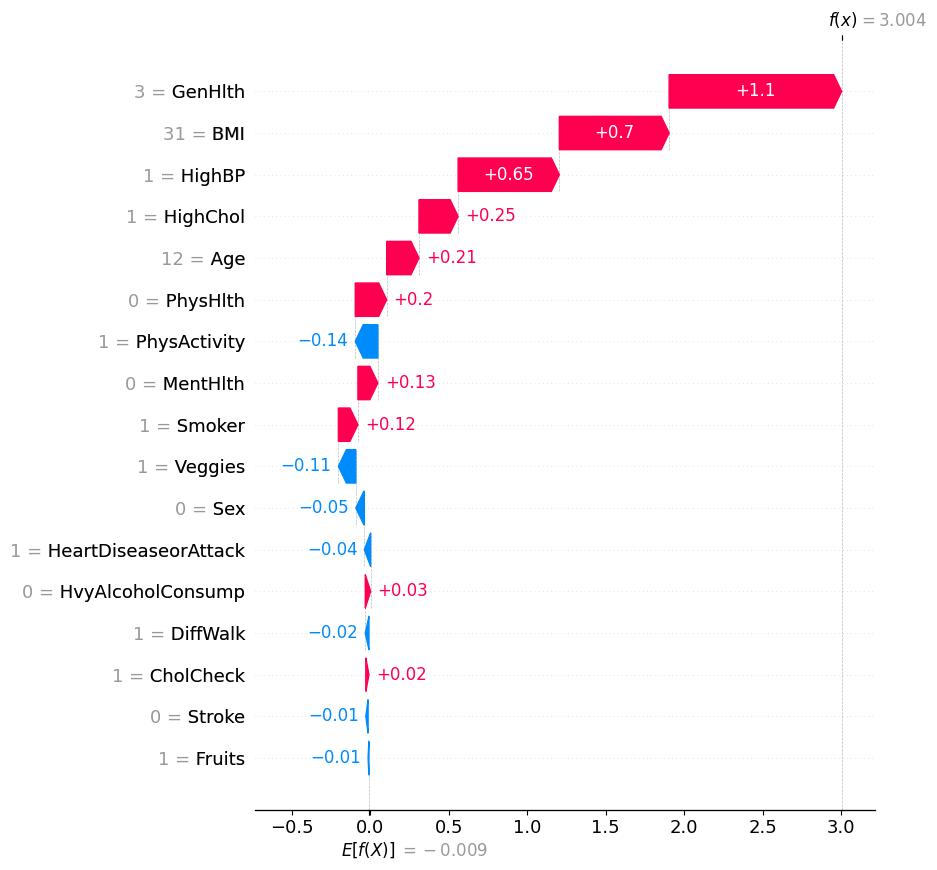

In [ ]:
idx=1
shap.plots.waterfall(shap_values[idx,:],
                     max_display=17)

In [ ]:
idx = 9

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[idx,:],
                X_test.iloc[idx,:],
                link="logit")

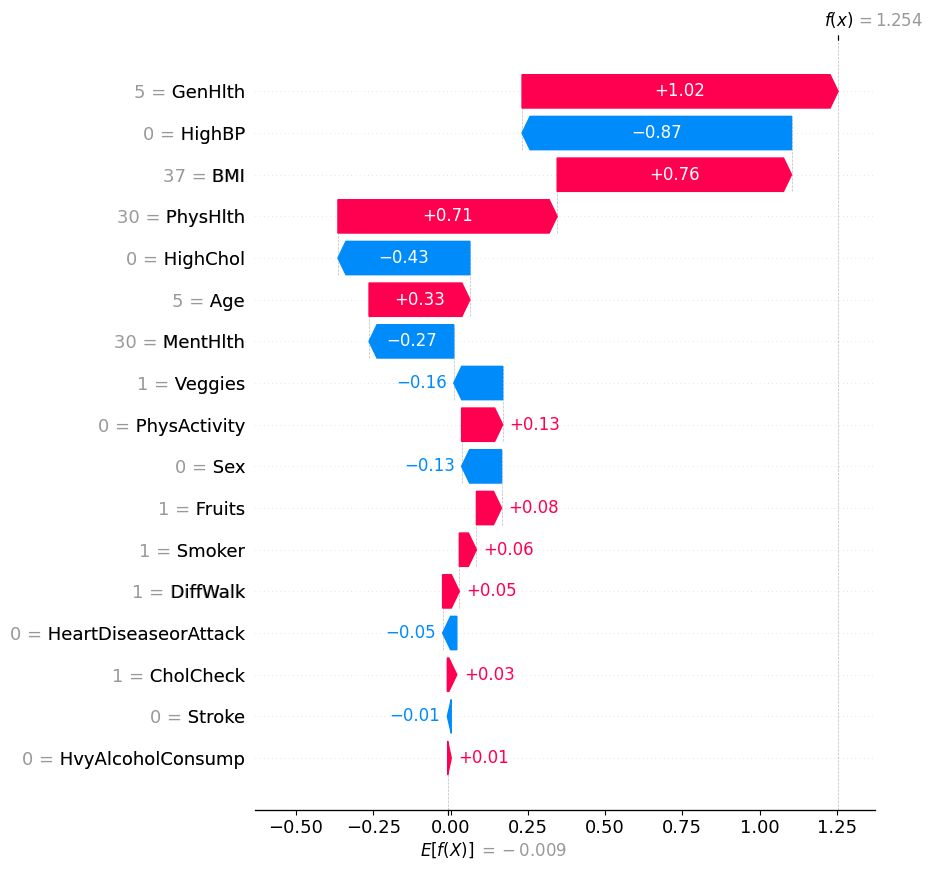

In [ ]:
idx=9
shap.plots.waterfall(shap_values[idx,:],
                     max_display=17)

In [ ]:
idx = 150

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[idx,:],
                X_test.iloc[idx,:],
                link="logit")

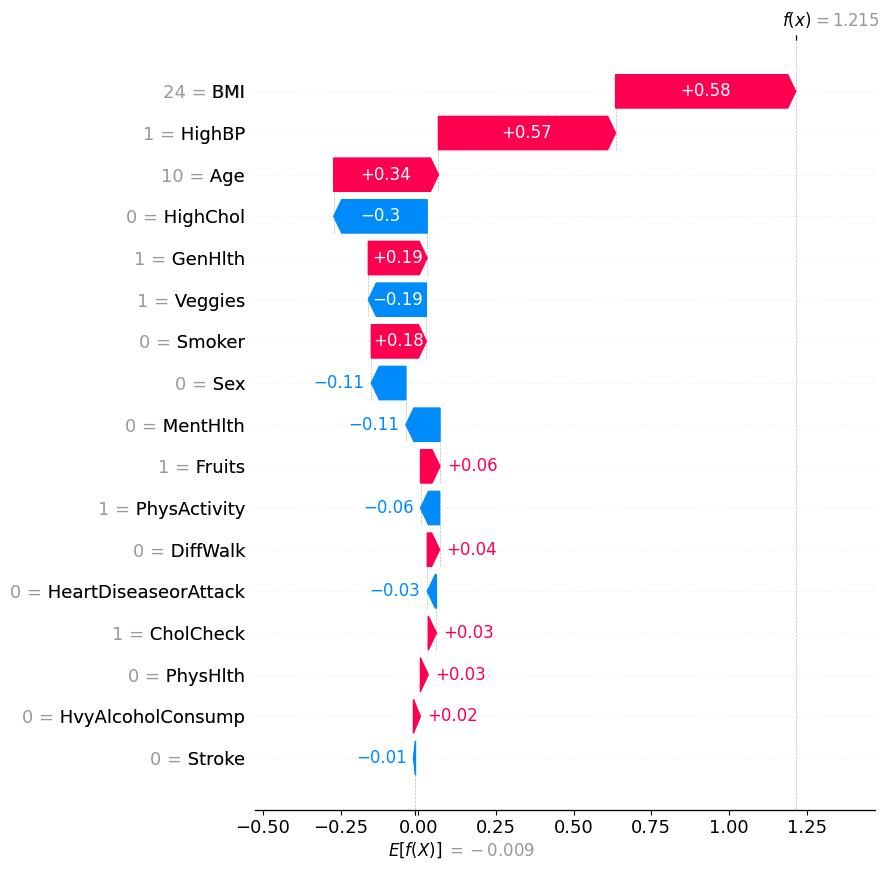

In [ ]:
idx=150
shap.plots.waterfall(shap_values[idx,:],
                     max_display=17)


**¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?**

Las variables que afectan de manera positiva a poseer diabetes mayormente son: GenHlth, BMI, Age, PhysHlth. En el caso de las que afectan de manera negativa se observan: Veggies, MenHlth, Sex.

**¿Existe algún patrón común entre las instancias analizadas?**

Se observa que tanto GenHlth como BMI tienden a aportar de forma positiva y con mayor importancia en las tren instancias.

**¿Es posible generalizar estas conclusiones a todo el dataset?**

Es posible sacar conclusiones locales, pero no es adecuado generalizar a todo el dataset debido a que en este caso se tiene que los resultados varian significativamente para diferentes instancias, esto gracias a la naturaleza individualizada de las contribuciones de cada característica a cada predicción. Como muestra de esto se tiene que PhysAtivity por ejemplo afecta de forma negativa a la instancia 1 y 150, mientras que afecta de forma positiva en la instancia 9.

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

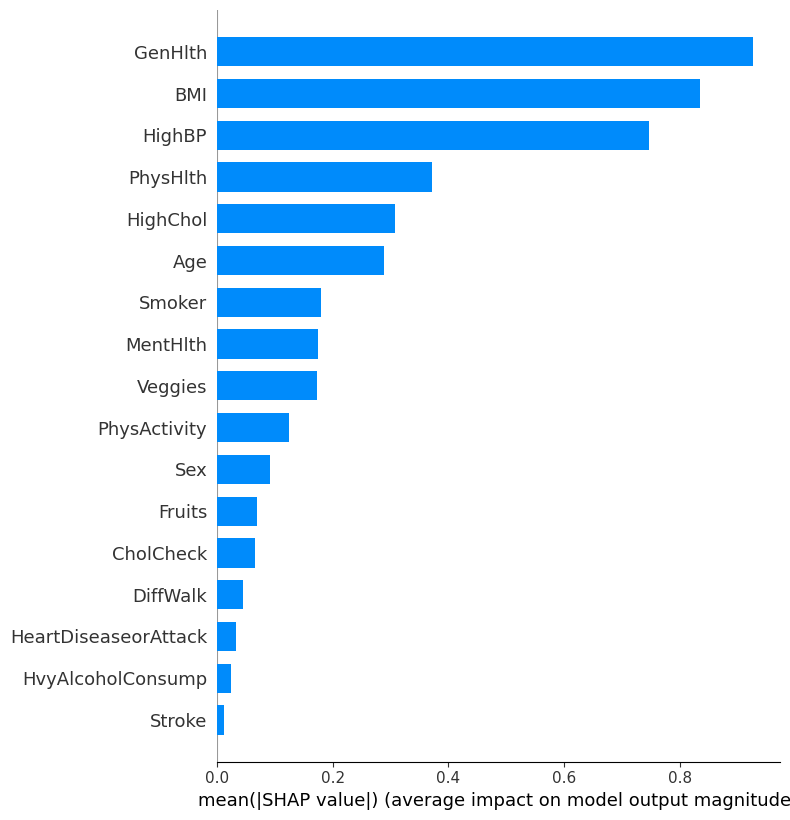

In [ ]:
# Inserte código para generar gráficos de aporte global aquí

shap.summary_plot(shap_values, X_test, plot_type="bar")

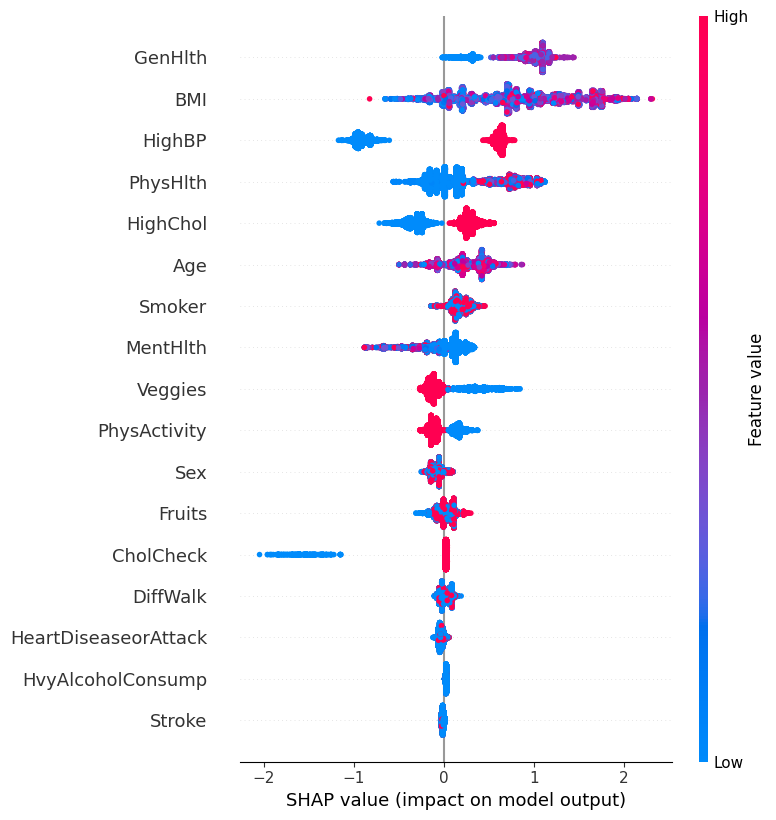

In [ ]:
shap.summary_plot(shap_values, X_test)

**¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?**

En cuanto a los aportes globales, se observa que en general se mantienen algunas variables con mayor relevancia, como GenHlth, BMI y HighBP. Sin embargo, en este caso se visualiza que para ciertas variables, en rangos específicos de shap value estos aportes son positivos o negativos. Por ejemplo, en el caso de HighBP se observa una separación clara donde valores de shap negativos significa probablemente un impacto negativo de HighBP y si es positivo es un impacto positivo, esto se repite con la variables HighChol. Lo contrario a esto ocurre con características como Veggies y CholCheck. Además, para el caso de PhysHlth se había visualizado que presentaba mayormente un impacto positivo, pero en términos globales se tiene que varía bastante en sus shap values dependiendo de los casos.

### 5.4 Scatter plot (0.4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [ ]:
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

In [ ]:
feature_importance_names[:17][0]

'GenHlth'

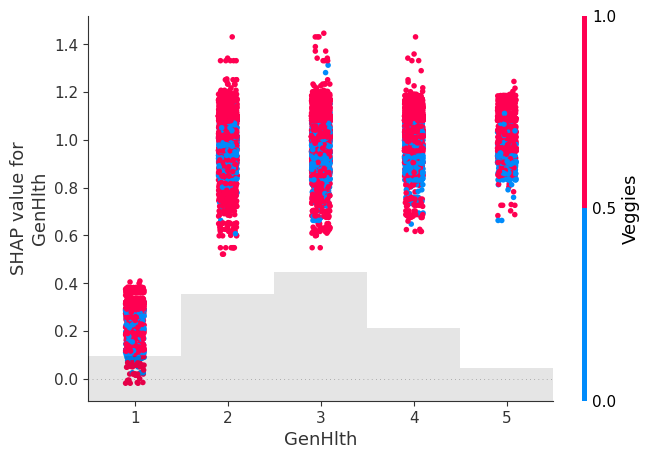

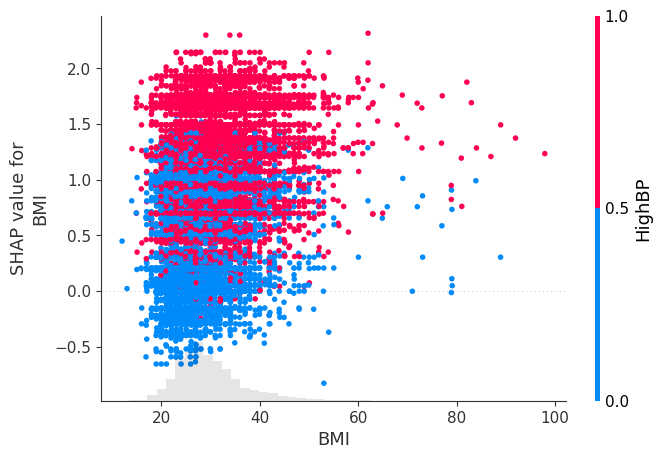

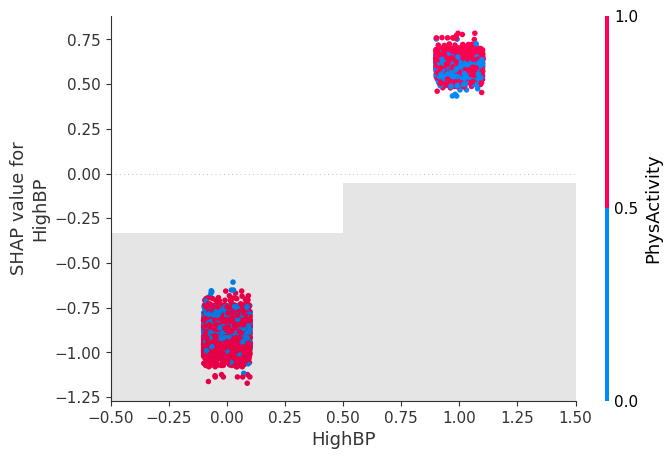

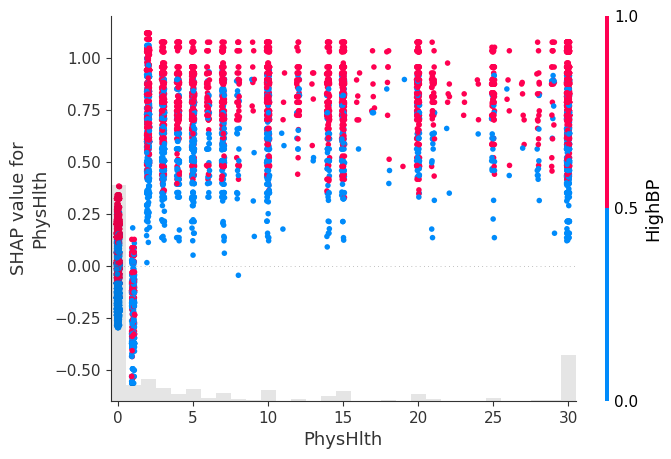

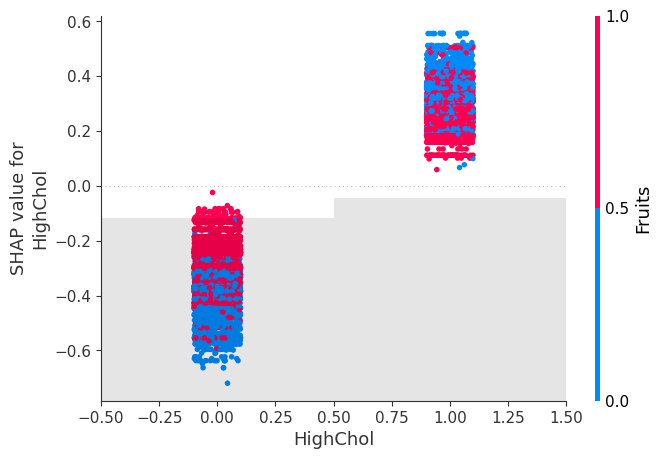

In [ ]:
# Inserte código para generar gráficos de feature vs shap value aquí

for i in range(5):
    shap.plots.scatter(shap_values[:,feature_importance_names[:17][i]],
                       color = shap_values)

**¿Qué puede concluir de sus resultados?**

Del primer grafico se puede observar que hay una tendencia positiva, ya que los shap values tienen a aumentar a medida que aumenta el indice de GenHlth, con cierta saturación luego del número 3. Esto tiene sentido ya que este indice habla del estado de salud de la persona. De esta forma, los puntos rojos se ubican principalemente en la parte superior, dando cuenta que  altos valores de 'GenHlth' (mala salud del paciente) tienden a tener alto riesgo de diabetes.

En cuanto a la segunda característica (BMI), se puede ver que los shap values también tienden a aumentar con el aumento del BMI. Asimismo, los puntos rojos se posicionan mayormente arriba, mientras que los azules abajo. Lo cual tiene sentido, ya que un mayor índice de masa corporal contribuye significativamente a una mayor probabilidad de diabetes.

En el caso de la característica HightBP, esta nos indica si el paciente presenta alta presión alterial (1) o no (0). Para el caso de HighBP igual a 1 se observa que los shap values son positivos , mientras que para  HighBP igual a 1, estos valores son negativos, lo que sugiere que tener presión arterial alta aumenta significativamente la probabilidad de diabetes.

La caracteristica que lleva or nombre PhysHlth, indica los días de mala salud física en el último mes. En este caso se observa que los shap values aumentan a medida que lo hacen los dias de mala salud fisica, siendo los valores más altos los que presnetan mayor cantidad de puntos rojos. Esto indica que un alto indice de esta caracteristica esta asociado a un mayor riesgo de padecer diabetes.

Por ultimo, la característica HighChol, al igual que HightBP es binaria, e indica si los pacientes tienen colesterol alto (1) o no lo tienen (0). Para el primer caso se puede ver que la coloración roja aumenta a medida que lo hacen los shap values, pero para el caso de HighChol igual a 1, se observa una tendencia inversa, por lo que no se muestra una relación directamente ligada a la enfermedad.




### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

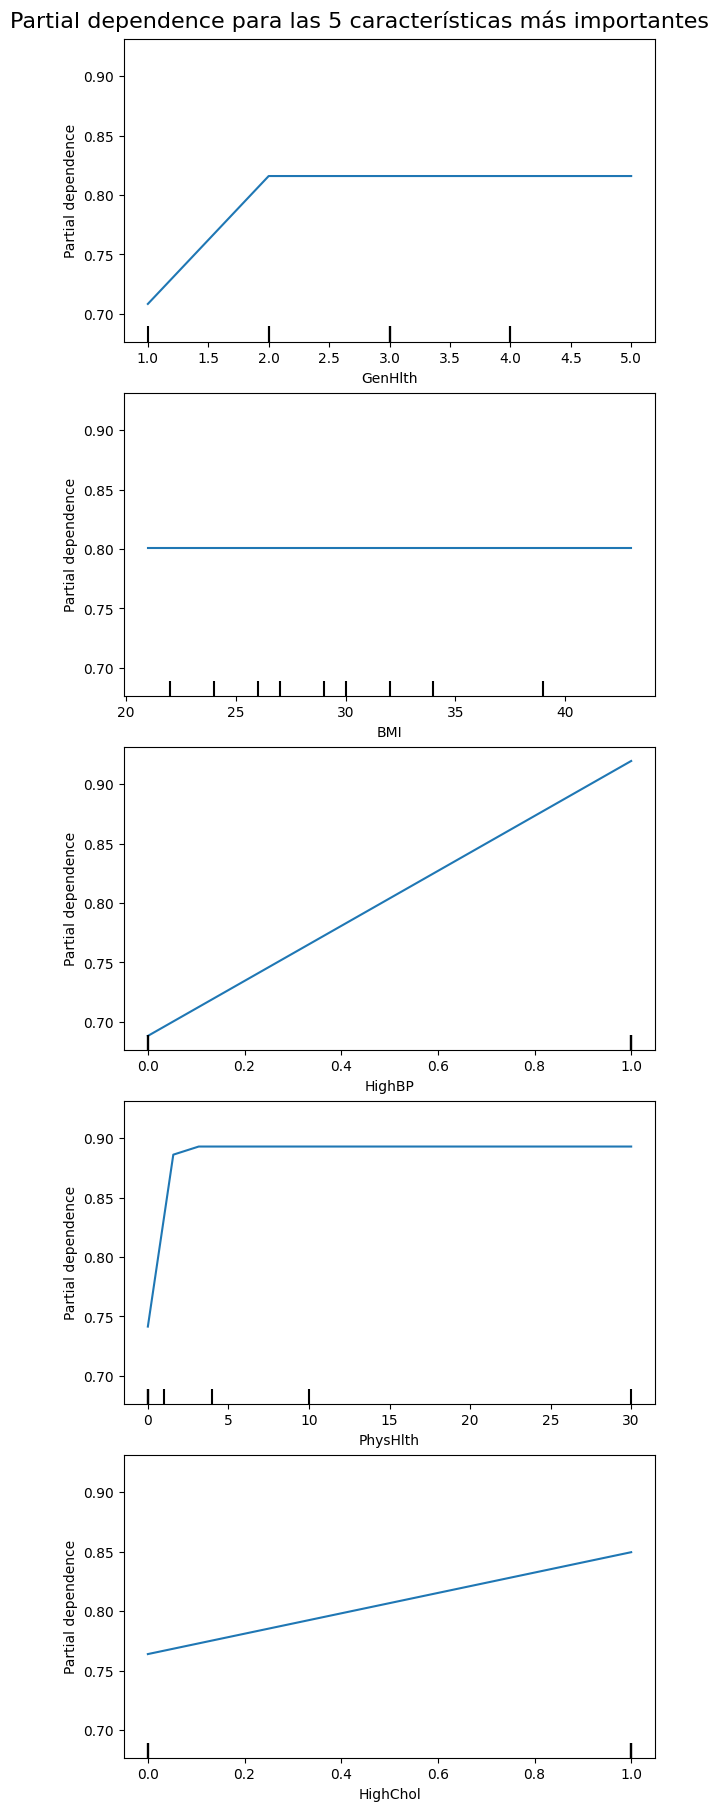

In [ ]:
# Inserte código para generar gráficos PDP aquí
from sklearn.inspection import PartialDependenceDisplay

common_params = {
    "subsample": 1000,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 30,
}

features_info = {
    # features of interest
    "features": [feature_importance_names[:17][0], feature_importance_names[:17][1],
                 feature_importance_names[:17][2], feature_importance_names[:17][3],
                 feature_importance_names[:17][4]],
    # type of partial dependence plot
    "kind": "average",
}


_, ax = plt.subplots(ncols=1, nrows=5, figsize=(6, 18), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    pipeline[1],
    X_train,
    **features_info,
    ax=ax,
    **common_params,
)
_ = display.figure_.suptitle(
    "Partial dependence para las 5 características más importantes",
    fontsize=16,
)

**¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?**

Para la variable GenHlth, se observa un incremento en la dependencia de la salida del modelo a medida que aumenta el valor de esta característica, aunque este incremento se estabiliza a partir del valor 2. En el caso de BMI, la dependencia de la salida del modelo respecto a esta característica permanece constante a lo largo de todo el rango de valores. Las variables HighChol y HighBP muestran un patrón similar, donde la dependencia de la salida del modelo aumenta conforme aumentan sus valores. Por último, la característica PhysHlth muestra un aumento significativo en la dependencia en sus valores bajos, pero este efecto se nivela y se mantiene constante para valores más altos.

Aunque las conclusiones derivadas de este análisis ofrecen una visión del comportamiento del modelo en relación con estas variables específicas, no se considera recomendable generalizar estos resultados a todo el conjunto de datos sin más consideraciones. Primero se debería verificar que la muestra de 1000 instancias utilizada para el análisis sea representativa del conjunto total. Sin esta verificación, existe el riesgo de que las tendencias observadas no reflejen con precisión el comportamiento del modelo en diferentes segmentos o condiciones presentes en el conjunto de datos completo. Por tanto, para utilizar estas conclusiones a nivel general, se considera recomendable realizar análisis adicionales que confirmen la representatividad de la muestra y la tendencia observada en distintos subconjuntos de datos.


## 6. Sistema de Reglas! (1.0 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.0 MB/s eta 0:00:00


In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
predict_fn = lambda x: pipeline[1].predict(x) # creamos función de predicción
explainer = AnchorTabular(predict_fn, feature_names = numerical_columns, seed=1) # instanciamos Anchor usando función creada
explainer.fit(X_train.to_numpy()) # sobre los datos

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 1, 'disc_perc': (25, 50, 75)},
  'version': '0.9.6'}
)

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

obs = np.array(X_test.iloc[idx], ndmin = 2) # array de la obs

explanation = explainer.explain(obs, threshold=0.95) # generar anchor
print('Prediction: ', explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]) # obtener prediccion del modelo
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage) # obtener cobertura

idx = 3001
# explicar predicción idx 3001

explanation = explainer.explain(obs, threshold=0.95) # generar anchor
print('Prediction: ', explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]) # obtener prediccion del modelo
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage) # obtener cobertura

idx = 5751
# explicar predicción idx 5751

explanation = explainer.explain(obs, threshold=0.95) # generar anchor
print('Prediction: ', explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]) # obtener prediccion del modelo
print('Anchor: %s' % (' AND '.join(explanation.anchor))) # obtener regla
print('Precision: %.2f' % explanation.precision) # obtener precision
print('Coverage: %.2f' % explanation.coverage) # obtener cobertura

Prediction:  1
Anchor: HighBP > 0.00
Precision: 0.99
Coverage: 0.56
Prediction:  1
Anchor: HighBP > 0.00
Precision: 0.99
Coverage: 0.56
Prediction:  1
Anchor: HighBP > 0.00
Precision: 0.98
Coverage: 0.56


**¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.**

Se distingue que se mantiene una sola regla para las tres instancias que es HighBP > 0. Se sabe que la presión arterial alta podría relacionarse con un diagnostico de diabetes, por lo que sí tiene sentido que esta regla sea efectiva. No obstante, la cobertura observada es de tan solo 56% de los datos, esto indica que no es adecuada para un 44% de los datos, que es un amplio número de casos. Es por esto que, para mejorar la comprensión y efectividad del modelo, sería beneficioso explorar otras características que podrían influir en las predicciones para el 44% de los casos restantes, donde la regla HighBP > 0 no es aplicable.

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

 Los métodos agnósticos globales se consideran útiles para obtener una visión general del comportamiento del modelo y validar la consistencia de las predicciones del modelo con conocimientos médicos. Esto es importante para garantizar que el modelo es confiable y seguro desde una perspectiva médica. Así, se fomenta la confianza en el uso del modelo a nivel de sistema de salud. Además, estos métodos permiten mostrar las variables que son más importntes en términos generales, asegurando que las características sean consistentes con los diagnósticos dados.

 Los métodos agnósticos locales se consideran útiles cuando se necesitan explicar decisiones específicas del modelo, viendo individualmente las variables que influyeron en la decisión del modelo para cada caso.

 De acuerdo a las observaciones anterioresy las secciones vistas en este laboratorio, en el contexto proporcionado por Dr. Simi se concluye que, si bien ambos métodos entregan información relevante para el problema, los métodos locales podrían ser más cruciales dado que muestran explicaciones personalizadas sobre las decisiones de diagnóstico a cada paciente. Los diagnósticos médicos tienen un impacto significativo en la vida de los pacientes, por lo que resulta esencial que cada persona comprenda claramente por qué ha sido diagnosticada con diabetes o por qué no. Los métodos de interpretación local vistos en este laboratorio podrían considerarse más valiosos en este contexto porque descomponen las predicciones del modelo a nivel individual. Estos métodos explican cómo y por qué ciertas características clínicas han influido en la decisión específica del modelo, proporcionando así claridad y justificación en cada caso.



# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>